<a href="https://colab.research.google.com/github/suumino/tensor/blob/main/chap02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [4]:
!pip install --upgrade pandas --use-feature=2020-resolver
!pip install --upgrade matplotlib --use-feature=2020-resolver
!pip install --upgrade seaborn --use-feature=2020-resolver
!pip install --upgrade scikit-learn --use-feature=2020-resolver


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --use-feature

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --use-feature

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <arc

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

In [3]:
print(tf.__version__)

2.5.0


In [5]:
cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety', 'output']
cars = pd.read_csv('car_evaluation.csv', names=cols, header=None)

In [6]:
cars.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


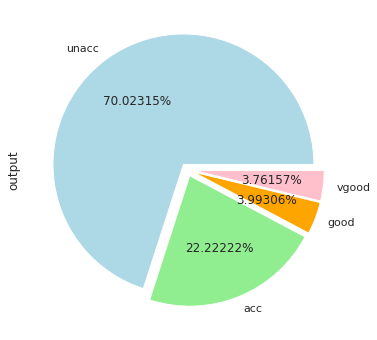

In [13]:
plot_size = plt.rcParams['figure.figsize']
plot_size [0] = 8
plot_size [1] = 6
plt.rcParams['figure.figsize'] = plot_size
cars.output.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05, 0.05))

In [16]:
price = pd.get_dummies(cars.price, prefix='price')
maint = pd.get_dummies(cars.maint, prefix='maint')

doors = pd.get_dummies(cars.doors, prefix='doors')
persons = pd.get_dummies(cars.persons, prefix='persons')

lug_capacity = pd.get_dummies(cars.lug_capacity, prefix='lug_capacity')
safety = pd.get_dummies(cars.safety, prefix='safety')

labels = pd.get_dummies(cars.output, prefix='condition')

X = pd.concat([price, maint, doors, persons, lug_capacity, safety], axis=1)
y = labels.values

In [17]:
cars.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [18]:
X

,price_high,price_low,price_med,price_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,doors_4,doors_5more,persons_2,persons_4,persons_more,lug_capacity_big,lug_capacity_med,lug_capacity_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1
1724,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0
1725,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0
1726,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [21]:
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(15, activation='relu')(input_layer)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
output = Dense(y.shape[1], activation='softmax')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 15)                330       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 44        
Total params: 534
Trainable params: 534
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(X_train, y_train, batch_size=8, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
139/139 [==============================] - 1s 3ms/step - loss: 1.3037 - acc: 0.4217 - val_loss: 1.0019 - val_acc: 0.6498
Epoch 2/50
139/139 [==============================] - 0s 2ms/step - loss: 0.7772 - acc: 0.7195 - val_loss: 0.7900 - val_acc: 0.6462
Epoch 3/50
139/139 [==============================] - 0s 2ms/step - loss: 0.6087 - acc: 0.7457 - val_loss: 0.6680 - val_acc: 0.6643
Epoch 4/50
139/139 [==============================] - 0s 2ms/step - loss: 0.4787 - acc: 0.8027 - val_loss: 0.5351 - val_acc: 0.7906
Epoch 5/50
139/139 [==============================] - 0s 2ms/step - loss: 0.3793 - acc: 0.8643 - val_loss: 0.4557 - val_acc: 0.8231
Epoch 6/50
139/139 [==============================] - 0s 2ms/step - loss: 0.3238 - acc: 0.8851 - val_loss: 0.4077 - val_acc: 0.8159
Epoch 7/50
139/139 [==============================] - 0s 2ms/step - loss: 0.2899 - acc: 0.8869 - val_loss: 0.3674 - val_acc: 0.8303
Epoch 8/50
139/139 [==============================] - 0s 2ms/step - loss: 0.

In [24]:
score=model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

11/11 [==============================] - 0s 1ms/step - loss: 0.0629 - acc: 0.9769
Test Score: 0.0628521591424942
Test Accuracy: 0.9768785834312439
